## **Preparation and Explanation**

Informasi Data:

Dataset diperoleh dari **[Kaggle](https://www.kaggle.com/lava18/google-play-store-apps)** yang menampilkan detail aplikasi google play dari hasil web scraping 10 ribu aplikasi play store untuk menganalisis pasar Android. Dataset mengandung 13 fitur, yang masing-masing terdiri atas 10841 baris. Adapun penjelasan untuk setiap fitur adalah sebagai berikut:

1. App          = nama aplikasi
2. Category     = kategori aplikasi
3. Rating       = besaran penilaian pengguna (saat proses scraping)
4. Reviews      = ulasan pengguna aplikasi (saat proses scraping)
5. Size         = ukuran aplikasi (saat proses scraping)
6. Installs     = jumlah unduhan aplikasi (saat proses scraping)
7. Type         = tipe aplikasi, berbayar atau gratis
8. Price        = harga aplikasi (saat proses scraping)
9. Content      = patokan dalam batasan umur penggunaan aplikasi seperti semua umur, dewasa, remaja, anak-anak
10. Genres       = detail kategori (bisa multiple)
11. Last Updated = tanggal aplikasi terakhir diperbaharui (saat proses scraping)
12. Current      = versi aplikasi terbaru yang tersedia di play store (saat proses scraping)
13. Android Ver  = minimum versi android yang didukung (saat proses scraping)

In [0]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
import re
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from subprocess import call
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

csv = "https://raw.githubusercontent.com/zeroix15/TAbigdata/master/googleplaystore.csv"

## **1. Data Preprocessing**

In [341]:
df_all = pd.read_csv(csv, sep=",")
df_all.dropna(inplace=True)
df_all

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**Berikut adalah tampilan dari masing-masing 5 data pada indeks atas dan indeks bawah setelah kolom yang ingin digunakan diseleksi**

In [342]:
df = pd.read_csv(csv, sep=",", usecols = ['Category','Size','Type','Android Ver', 'Installs'])
df.dropna(inplace = True)
df.rename(columns = {'Android Ver':'MinAndroidVer'}, inplace = True)
df = df[df.MinAndroidVer != 'Varies with device']
df = df[df.Size != 'Varies with device']
df = df[df.Size != '1,000+']
df

,Category,Size,Installs,Type,MinAndroidVer
0,ART_AND_DESIGN,19M,"10,000+",Free,4.0.3 and up
1,ART_AND_DESIGN,14M,"500,000+",Free,4.0.3 and up
2,ART_AND_DESIGN,8.7M,"5,000,000+",Free,4.0.3 and up
3,ART_AND_DESIGN,25M,"50,000,000+",Free,4.2 and up
4,ART_AND_DESIGN,2.8M,"100,000+",Free,4.4 and up
...,...,...,...,...,...
10834,FAMILY,2.6M,500+,Free,4.1 and up
10835,BUSINESS,9.6M,10+,Free,4.0 and up
10836,FAMILY,53M,"5,000+",Free,4.1 and up
10837,FAMILY,3.6M,100+,Free,4.1 and up


**Mengecek apakah terdapat data yang kosong atau tidak pada dataframe menggunakan info()**

In [343]:
#checking the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9087 entries, 0 to 10838
Data columns (total 5 columns):
Category         9087 non-null object
Size             9087 non-null object
Installs         9087 non-null object
Type             9087 non-null object
MinAndroidVer    9087 non-null object
dtypes: object(5)
memory usage: 426.0+ KB


**Mengecek ragam isi dari masing-masing kolom**

In [344]:
df.MinAndroidVer.unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.2 and up',
       '5.0 and up', '6.0 and up', '1.6 and up', '2.1 and up',
       '5.1 and up', '1.5 and up', '7.0 and up', '4.3 and up',
       '4.0.3 - 7.1.1', '2.0 and up', '2.3.3 and up', '3.2 and up',
       '4.4W and up', '7.1 and up', '7.0 - 7.1.1', '8.0 and up',
       '5.0 - 8.0', '3.1 and up', '2.0.1 and up', '4.1 - 7.1.1',
       '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

In [345]:
df.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', '9.4M', '15M', '10M', '1.2M', '26M', '8.0M',
       '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M', '8.6M',
       '2.4M', '27M', '2.5M', '16M', '3.4M', '8.9M', '3.9M', '2.9M',
       '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M', '9.8M', '52M',
       '9.0M', '6.7M', '30M', '2.6M', '7.1M', '3.7M', '22M', '7.4M',
       '6.4M', '3.2M', '8.2M', '9.9M', '4.9M', '9.5M', '5.0M', '5.9M',
       '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '7.2M', '2.1M',
       '42M', '7.3M', '9.1M', '55M', '23k', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '118k', '44M', '695k', '1.6M', '6.2M', '18k', '53M', '1.4M

**Mengecek jumlah data masing-masing kategori**

In [346]:
df.Installs.value_counts()

1,000,000+        1295
100,000+          1049
10,000+           1009
1,000+             869
10,000,000+        810
100+               700
5,000,000+         527
500,000+           488
5,000+             461
50,000+            445
10+                376
500+               322
50+                201
100,000,000+       197
50,000,000+        145
5+                  78
1+                  64
500,000,000+        27
0+                  14
1,000,000,000+      10
Name: Installs, dtype: int64

In [347]:
df.Type.value_counts()

Free    8366
Paid     721
Name: Type, dtype: int64

In [348]:
df.MinAndroidVer.value_counts()

4.1 and up       2317
4.0.3 and up     1453
4.0 and up       1351
4.4 and up        910
2.3 and up        635
5.0 and up        556
4.2 and up        372
2.3.3 and up      276
2.2 and up        241
3.0 and up        241
4.3 and up        231
2.1 and up        134
1.6 and up        116
6.0 and up         57
7.0 and up         40
3.2 and up         36
2.0 and up         31
5.1 and up         23
1.5 and up         19
4.4W and up        12
3.1 and up         10
2.0.1 and up        7
8.0 and up          6
1.0 and up          2
5.0 - 8.0           2
7.1 and up          2
4.0.3 - 7.1.1       2
4.1 - 7.1.1         1
2.2 - 7.1.1         1
5.0 - 6.0           1
5.0 - 7.1.1         1
7.0 - 7.1.1         1
Name: MinAndroidVer, dtype: int64

Melakukan proses pre-processing dengan mengkonversi nilai dari **Size ke dalam bentuk float** serta **Installs ke dalam bentuk Boolean** (0 untuk tidak populer atau di bawah 100.000 penginstalan dan 1 untuk populer di atas 100.000 penginstalan)

In [349]:
df_new = df.copy()

new_size = []
for index, row in df.iterrows():
  size = row['Size']
  if 'M' in size:
    new_size.append(float(size[:-1]) * 1024 * 1024)
  elif 'k' in size:
    new_size.append(float(size[:-1]) * 1024)

df_new = df_new.assign(SizeInFloat = new_size, IsPopular = None)
df_new["IsPopular"] = df_new["Installs"].str.replace("+","") 
df_new["IsPopular"] = df_new["IsPopular"].str.replace(",","")
df_new['IsPopular'] = df_new["IsPopular"].astype("int64")
df_new['IsPopular'] = (df_new["IsPopular"] > 100000)*1
df_new

,Category,Size,Installs,Type,MinAndroidVer,SizeInFloat,IsPopular
0,ART_AND_DESIGN,19M,"10,000+",Free,4.0.3 and up,19922944.0,0
1,ART_AND_DESIGN,14M,"500,000+",Free,4.0.3 and up,14680064.0,1
2,ART_AND_DESIGN,8.7M,"5,000,000+",Free,4.0.3 and up,9122611.2,1
3,ART_AND_DESIGN,25M,"50,000,000+",Free,4.2 and up,26214400.0,1
4,ART_AND_DESIGN,2.8M,"100,000+",Free,4.4 and up,2936012.8,0
...,...,...,...,...,...,...,...
10834,FAMILY,2.6M,500+,Free,4.1 and up,2726297.6,0
10835,BUSINESS,9.6M,10+,Free,4.0 and up,10066329.6,0
10836,FAMILY,53M,"5,000+",Free,4.1 and up,55574528.0,0
10837,FAMILY,3.6M,100+,Free,4.1 and up,3774873.6,0


Melakukan proses pre-processing dengan **mengkonversi jangka dari sebuah versi dengan mengambil batas nilai minimalnya**. Contohnya: **4.4.2 and up** dikonversi menjadi **4.0 and up**

In [350]:
minAndroidArray = []
for minAndroid in df.MinAndroidVer.unique():
  if (re.search(r"and up\b", minAndroid) is None):
    minAndroidArray.append(minAndroid)
    
df_new.MinAndroidVer = df_new.MinAndroidVer.replace(minAndroidArray, np.nan)
df_new.dropna(inplace = True)

verAndroidStringArray = []

for i in range(1, 9):
  regex = "^" + str(i) + "."
  replaceString = str(i) + ".0 and up"
  verAndroidStringArray.append(replaceString)
  verAndroidArray = []
  for verAndroid in df.MinAndroidVer.unique():
    if (re.search(regex, verAndroid) is not None):
        verAndroidArray.append(verAndroid)
  df_new.MinAndroidVer = df_new.MinAndroidVer.replace(verAndroidArray, replaceString)

verAndroidStringArray

['1.0 and up',
 '2.0 and up',
 '3.0 and up',
 '4.0 and up',
 '5.0 and up',
 '6.0 and up',
 '7.0 and up',
 '8.0 and up']

In [351]:
df_new.MinAndroidVer.value_counts()

4.0 and up    6646
2.0 and up    1324
5.0 and up     579
3.0 and up     287
1.0 and up     137
6.0 and up      57
7.0 and up      42
8.0 and up       6
Name: MinAndroidVer, dtype: int64

**Menampilkan data yang telah dipreprocessing**

In [352]:
df_new

,Category,Size,Installs,Type,MinAndroidVer,SizeInFloat,IsPopular
0,ART_AND_DESIGN,19M,"10,000+",Free,4.0 and up,19922944.0,0
1,ART_AND_DESIGN,14M,"500,000+",Free,4.0 and up,14680064.0,1
2,ART_AND_DESIGN,8.7M,"5,000,000+",Free,4.0 and up,9122611.2,1
3,ART_AND_DESIGN,25M,"50,000,000+",Free,4.0 and up,26214400.0,1
4,ART_AND_DESIGN,2.8M,"100,000+",Free,4.0 and up,2936012.8,0
...,...,...,...,...,...,...,...
10834,FAMILY,2.6M,500+,Free,4.0 and up,2726297.6,0
10835,BUSINESS,9.6M,10+,Free,4.0 and up,10066329.6,0
10836,FAMILY,53M,"5,000+",Free,4.0 and up,55574528.0,0
10837,FAMILY,3.6M,100+,Free,4.0 and up,3774873.6,0


**Menampilkan informasi data yang telah dipreprocessing**

In [353]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9078 entries, 0 to 10838
Data columns (total 7 columns):
Category         9078 non-null object
Size             9078 non-null object
Installs         9078 non-null object
Type             9078 non-null object
MinAndroidVer    9078 non-null object
SizeInFloat      9078 non-null float64
IsPopular        9078 non-null int64
dtypes: float64(1), int64(1), object(5)
memory usage: 567.4+ KB


## **2. Data Visualization**

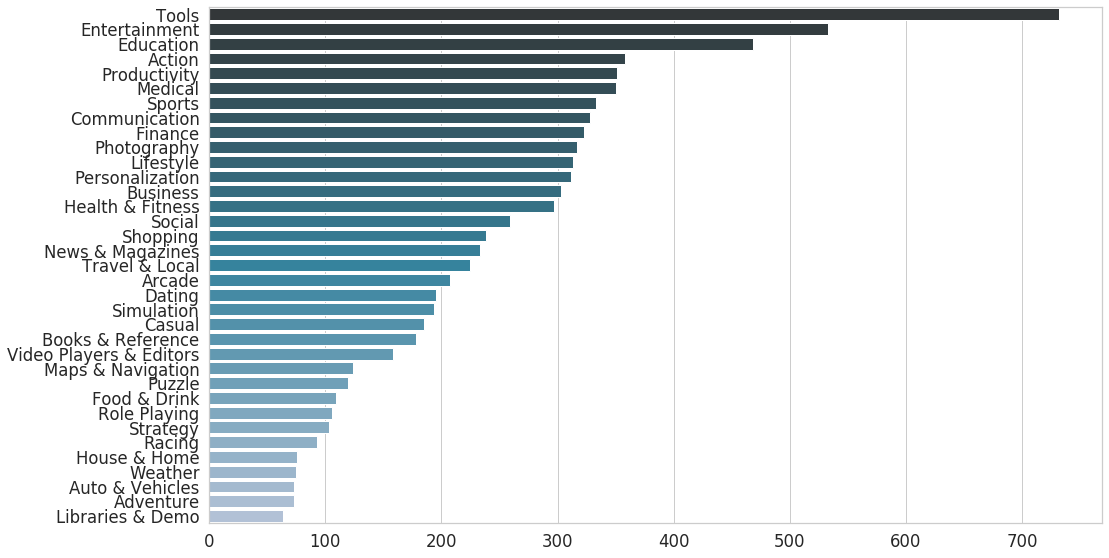

In [354]:
#Show top 35 app genres
plt.figure(figsize=(16, 9.5))
genres = df_all["Genres"].value_counts()[:35]
ax = sns.barplot(x=genres.values, y=genres.index, palette="PuBuGn_d")

In [355]:
layout = go.Layout(xaxis=dict(title='Ratings'),yaxis=dict(title='Number of Apps'))
data = [go.Histogram(x=df_all["Rating"])]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic histogram')

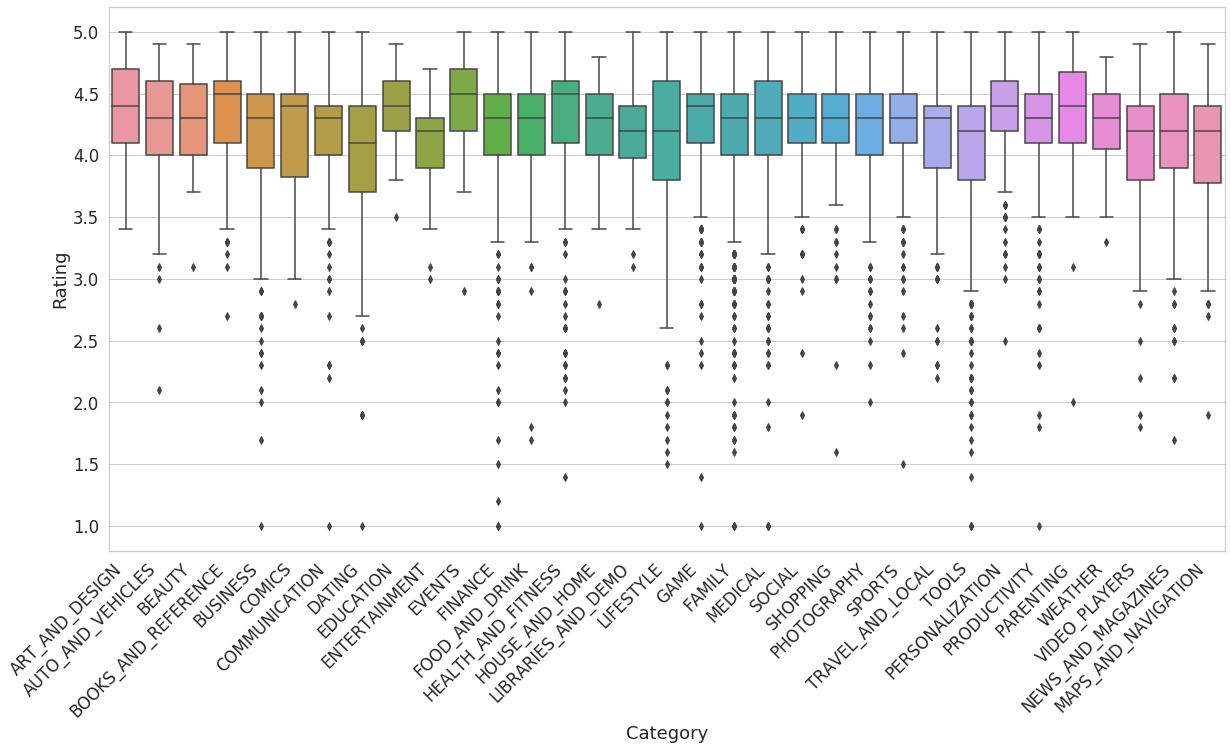

In [356]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating",data=df_all)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')

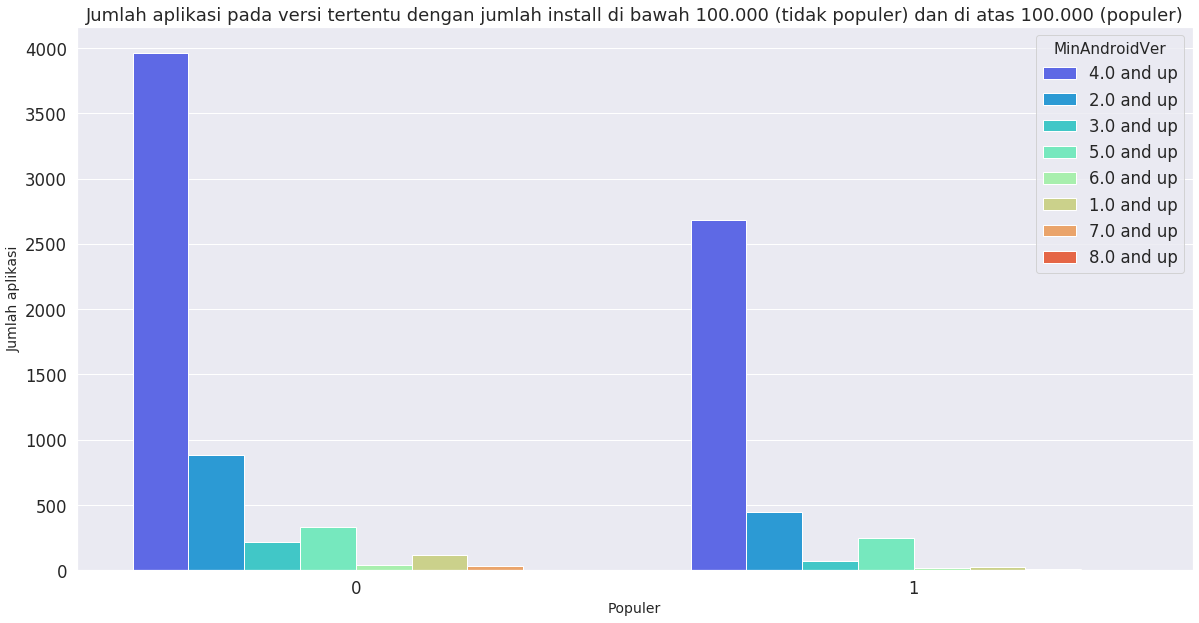

In [357]:
sns.set_style('darkgrid')
sns.countplot(x='IsPopular', hue='MinAndroidVer', data=df_new, palette='rainbow')
plt.title('Jumlah aplikasi pada versi tertentu dengan jumlah install di bawah 100.000 (tidak populer) dan di atas 100.000 (populer)')
plt.xlabel('Populer', fontsize=14)
plt.ylabel('Jumlah aplikasi', fontsize=14)
plt.show()

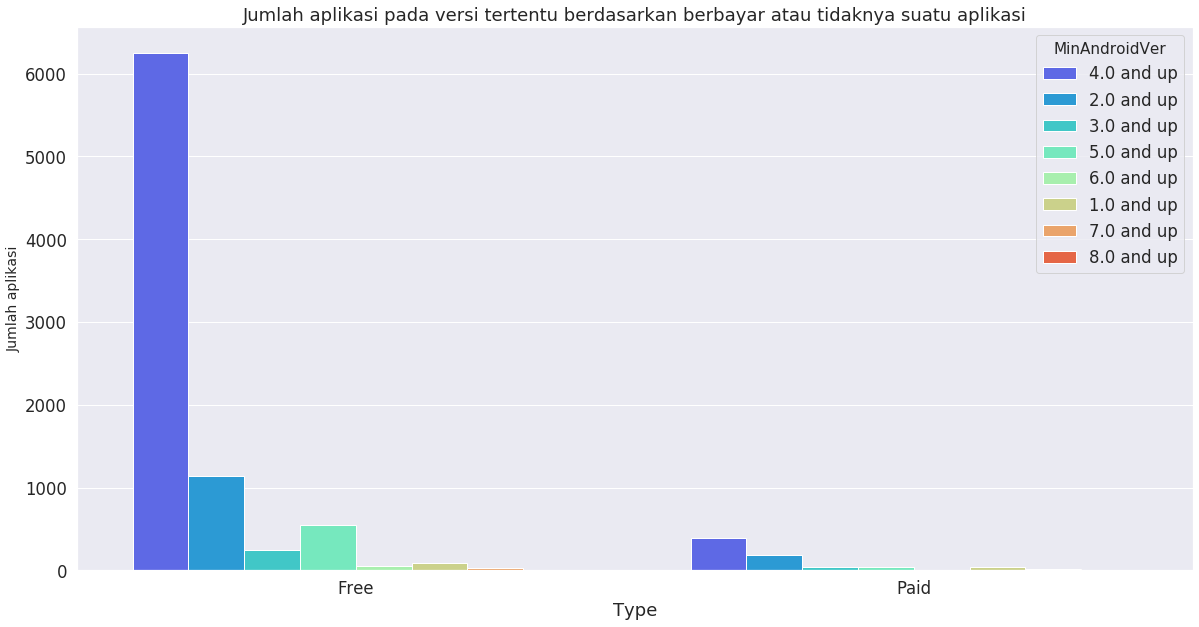

In [358]:
sns.set_style('darkgrid')
sns.countplot(x='Type', hue='MinAndroidVer', data=df_new, palette='rainbow')
plt.title('Jumlah aplikasi pada versi tertentu berdasarkan berbayar atau tidaknya suatu aplikasi')
# plt.xlabel('Berbayar atau tidak', fontsize=14)
plt.ylabel('Jumlah aplikasi', fontsize=14)
plt.show()

## **3. Data Assigning and Label Encoding**

Mengambil data dari dataframe untuk variabel independen yaitu **Category**, **Type**, **SizeInFloat**, dan **MinAndroidVer**

In [359]:
X = df_new[['Category', 'Type', 'SizeInFloat', 'MinAndroidVer']].values
X[0:5]

array([['ART_AND_DESIGN', 'Free', 19922944.0, '4.0 and up'],
       ['ART_AND_DESIGN', 'Free', 14680064.0, '4.0 and up'],
       ['ART_AND_DESIGN', 'Free', 9122611.2, '4.0 and up'],
       ['ART_AND_DESIGN', 'Free', 26214400.0, '4.0 and up'],
       ['ART_AND_DESIGN', 'Free', 2936012.8, '4.0 and up']], dtype=object)

Mengganti nilai dari value String pada **Category** ke dalam angka

In [360]:
le_category = LabelEncoder()
le_category.fit(df_new["Category"].unique())
X[:,0] = le_category.transform(X[:,0]) 
X

array([[0, 'Free', 19922944.0, '4.0 and up'],
       [0, 'Free', 14680064.0, '4.0 and up'],
       [0, 'Free', 9122611.2, '4.0 and up'],
       ...,
       [11, 'Free', 55574528.0, '4.0 and up'],
       [11, 'Free', 3774873.6, '4.0 and up'],
       [20, 'Free', 9961472.0, '2.0 and up']], dtype=object)

Mengganti nilai dari value String pada **Type** ke dalam angka

In [361]:
le_free = LabelEncoder()
le_free.fit(['Free', 'Paid'])
X[:,1] = le_free.transform(X[:,1])
X[0:5]

array([[0, 0, 19922944.0, '4.0 and up'],
       [0, 0, 14680064.0, '4.0 and up'],
       [0, 0, 9122611.2, '4.0 and up'],
       [0, 0, 26214400.0, '4.0 and up'],
       [0, 0, 2936012.8, '4.0 and up']], dtype=object)

Mengganti nilai dari value String pada **Min Android Ver** ke dalam angka

In [362]:
le_android = LabelEncoder()
le_android.fit(verAndroidStringArray)
X[:,3] = le_android.transform(X[:,3])
X[0:5]

array([[0, 0, 19922944.0, 3],
       [0, 0, 14680064.0, 3],
       [0, 0, 9122611.2, 3],
       [0, 0, 26214400.0, 3],
       [0, 0, 2936012.8, 3]], dtype=object)

Mengambil data dari dataframe untuk variabel dependen yaitu **IsPopular**

In [363]:
y = df_new[["IsPopular"]].values
y[0:10]

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0]])

## **4. Classification: Decision Tree**

Membagikan data ke dalam rasio 70% untuk data latih dan 30% untuk data uji, dan angka 3 sebagai angka *random seed*

In [0]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [365]:
accuracy = 0
bestAccuracy = 0
bestDepth = 0
bestTree = None

for depth in range (1, 21):
  playstoreTree = tree.DecisionTreeClassifier(criterion="entropy", max_depth = depth)
  playstoreTree.fit(X_trainset, y_trainset)
  y_predict = playstoreTree.predict(X_testset)

  oldAccuracy = accuracy
  accuracy = metrics.accuracy_score(y_testset, y_predict)
  print("Decision Tree with depth " + str(depth) + " accuracy : ", accuracy)

  if (accuracy > bestAccuracy):
    bestAccuracy = accuracy
    bestDepth = depth
    bestTree = playstoreTree

if bestTree is not None:
  y_predict = bestTree.predict(X_testset)
  accuracy = metrics.accuracy_score(y_testset, y_predict)
  print("\nAkurasi terbaik terdapat pada Pohon Keputusan dengan kedalaman " + str(bestDepth) + (" dengan akurasi %.2f persen" % round(accuracy * 100 , 4)))


Decision Tree with depth 1 accuracy :  0.6233480176211453
Decision Tree with depth 2 accuracy :  0.6530837004405287
Decision Tree with depth 3 accuracy :  0.6787812041116006
Decision Tree with depth 4 accuracy :  0.6813509544787077
Decision Tree with depth 5 accuracy :  0.6780469897209985
Decision Tree with depth 6 accuracy :  0.6853891336270191
Decision Tree with depth 7 accuracy :  0.6765785609397944
Decision Tree with depth 8 accuracy :  0.6956681350954479
Decision Tree with depth 9 accuracy :  0.6989720998531571
Decision Tree with depth 10 accuracy :  0.6919970631424376
Decision Tree with depth 11 accuracy :  0.6945668135095447
Decision Tree with depth 12 accuracy :  0.6989720998531571
Decision Tree with depth 13 accuracy :  0.6890602055800293
Decision Tree with depth 14 accuracy :  0.6875917767988252
Decision Tree with depth 15 accuracy :  0.6813509544787077
Decision Tree with depth 16 accuracy :  0.6740088105726872
Decision Tree with depth 17 accuracy :  0.6747430249632893
Decisi

Mendapatkan akurasi terbaik dengan menggunakan **4 kolom (Category, Type, Size,dan Minimum Android Version)** sebagai sumber data untuk *mengklasifikasikan kemungkinan untuk sebuah aplikasi menjadi populer atau tidak* **pada kedalaman 9 atau 12** dengan akurasi **sekitar 69.5 - 69.9%** pada percobaan yang berbeda-beda

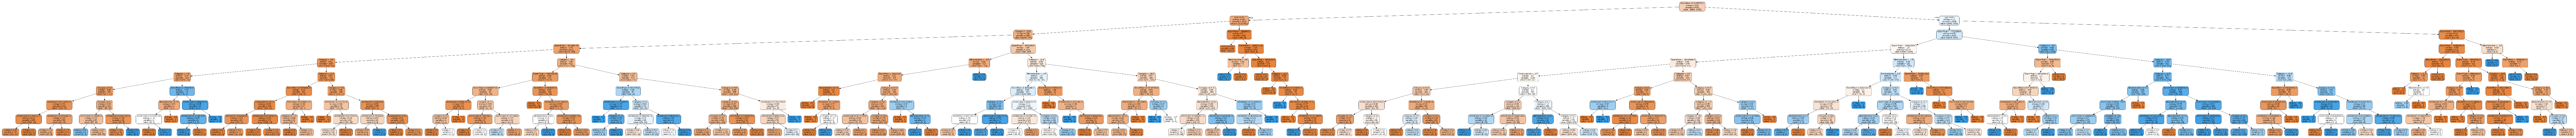

In [366]:
if bestTree is not None:
  tree.export_graphviz(bestTree, out_file='tree.dot', 
                feature_names = ['Category', 'Type', 'SizeInFloat', 'MinAndroidVer'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

  # Convert to png
  call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

  # Display in python
  plt.figure(figsize = (200, 200))
  plt.imshow(plt.imread('tree.png'))
  plt.axis('off');
  plt.show();

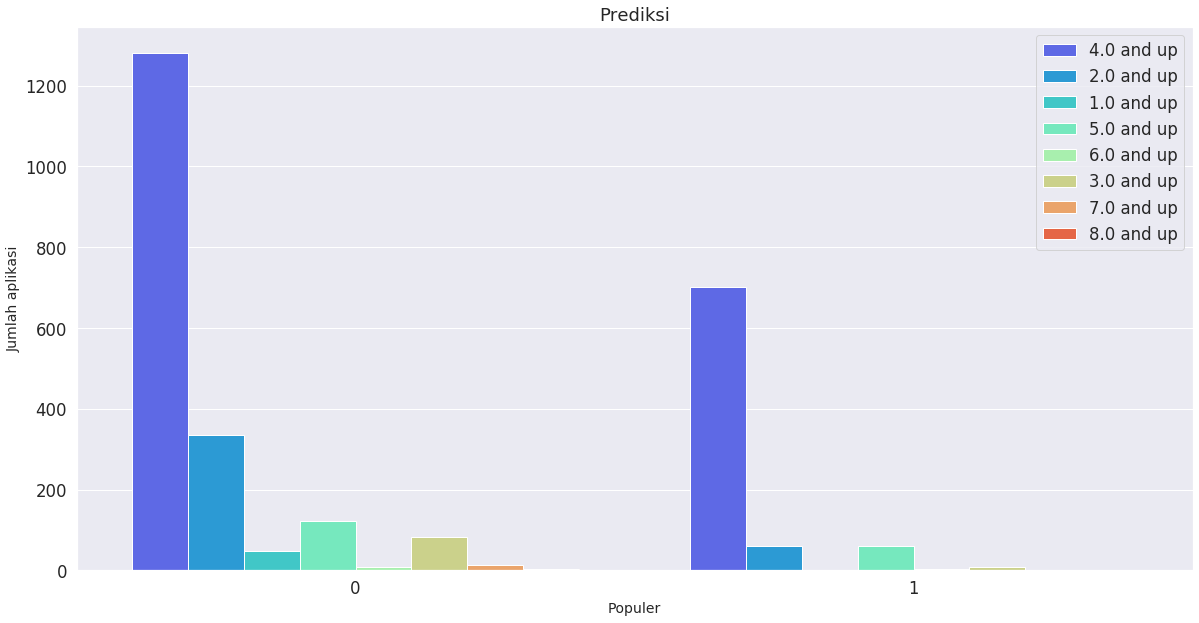

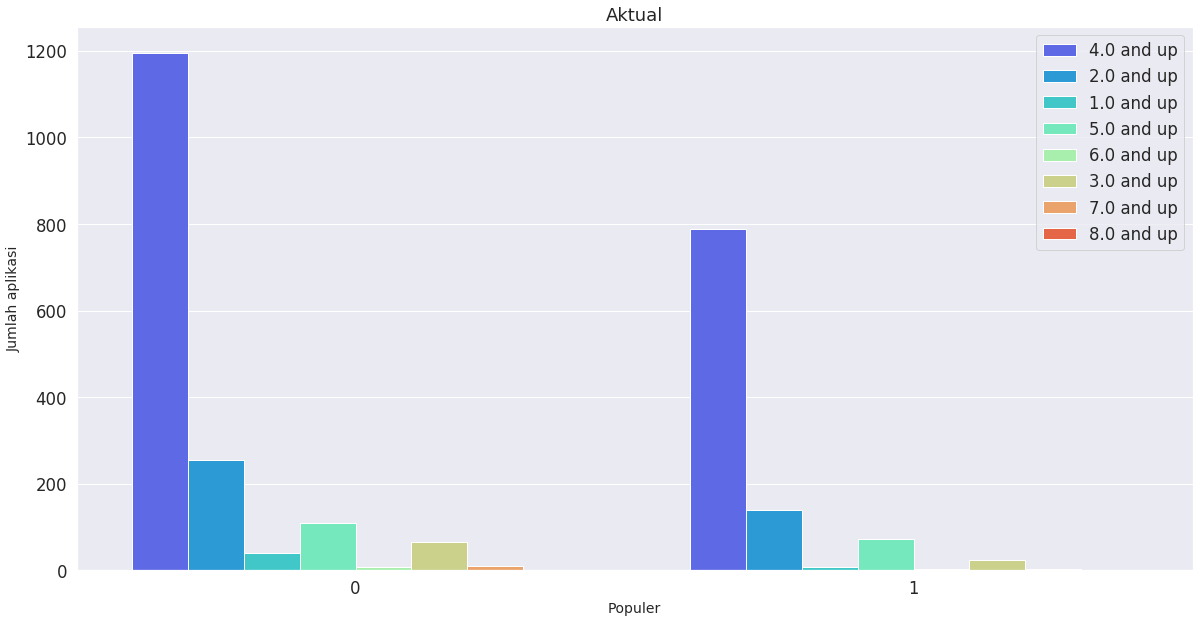

In [367]:
arrayPred = []
arrayTest = []
for pred in y_predict:
  arrayPred.append(pred)
for test in y_testset:
  arrayTest.append(test[0])

minAndroidTestArray = le_android.inverse_transform(X_testset[:,3].astype(int))
df_comp = pd.DataFrame(dict(prediksi=arrayPred, aktual=arrayTest, minAndroid=minAndroidTestArray))

sns.set_style('darkgrid')
sns.countplot(x='prediksi', hue='minAndroid', data=df_comp, palette='rainbow')
plt.title('Prediksi')
plt.xlabel('Populer', fontsize=14)
plt.ylabel('Jumlah aplikasi', fontsize=14)
plt.legend(loc='upper right')
plt.show()

sns.set_style('darkgrid')
sns.countplot(x='aktual', hue='minAndroid', data=df_comp, palette='rainbow')
plt.title('Aktual')
plt.xlabel('Populer', fontsize=14)
plt.ylabel('Jumlah aplikasi', fontsize=14)
plt.legend(loc='upper right')
plt.show()